Use “bill_authentication.csv” dataset. Your task is to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
#importing bill authentication dataset
bill_df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Bill_Authentication.csv')

In [3]:
bill_df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
bill_df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
bill_df['Class'].nunique()

2

In [7]:
#extracting features and target dataframe from the dataset
features_df=bill_df.iloc[:,0:4].values
target_df=bill_df.iloc[:,4].values

In [8]:
#standardizing features dataframe 
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
features_df=norm.fit_transform(features_df)

In [9]:
features_df.shape

(1372, 4)

In [10]:
target_df.shape

(1372,)

In [11]:
#splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state = 10)

In [12]:
#using training set to create a decision tree model
bill_tree=DecisionTreeClassifier(criterion="gini",random_state=10)
bill_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [13]:
#predicting y values using testing set
y_pred=bill_tree.predict(X_test)

In [14]:
#calculating accuracy score of the model
acc=accuracy_score(y_test,y_pred)*100
print( "Accuracy of decision tree classifier is ",round(acc,4))

Accuracy of decision tree classifier is  98.0583


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


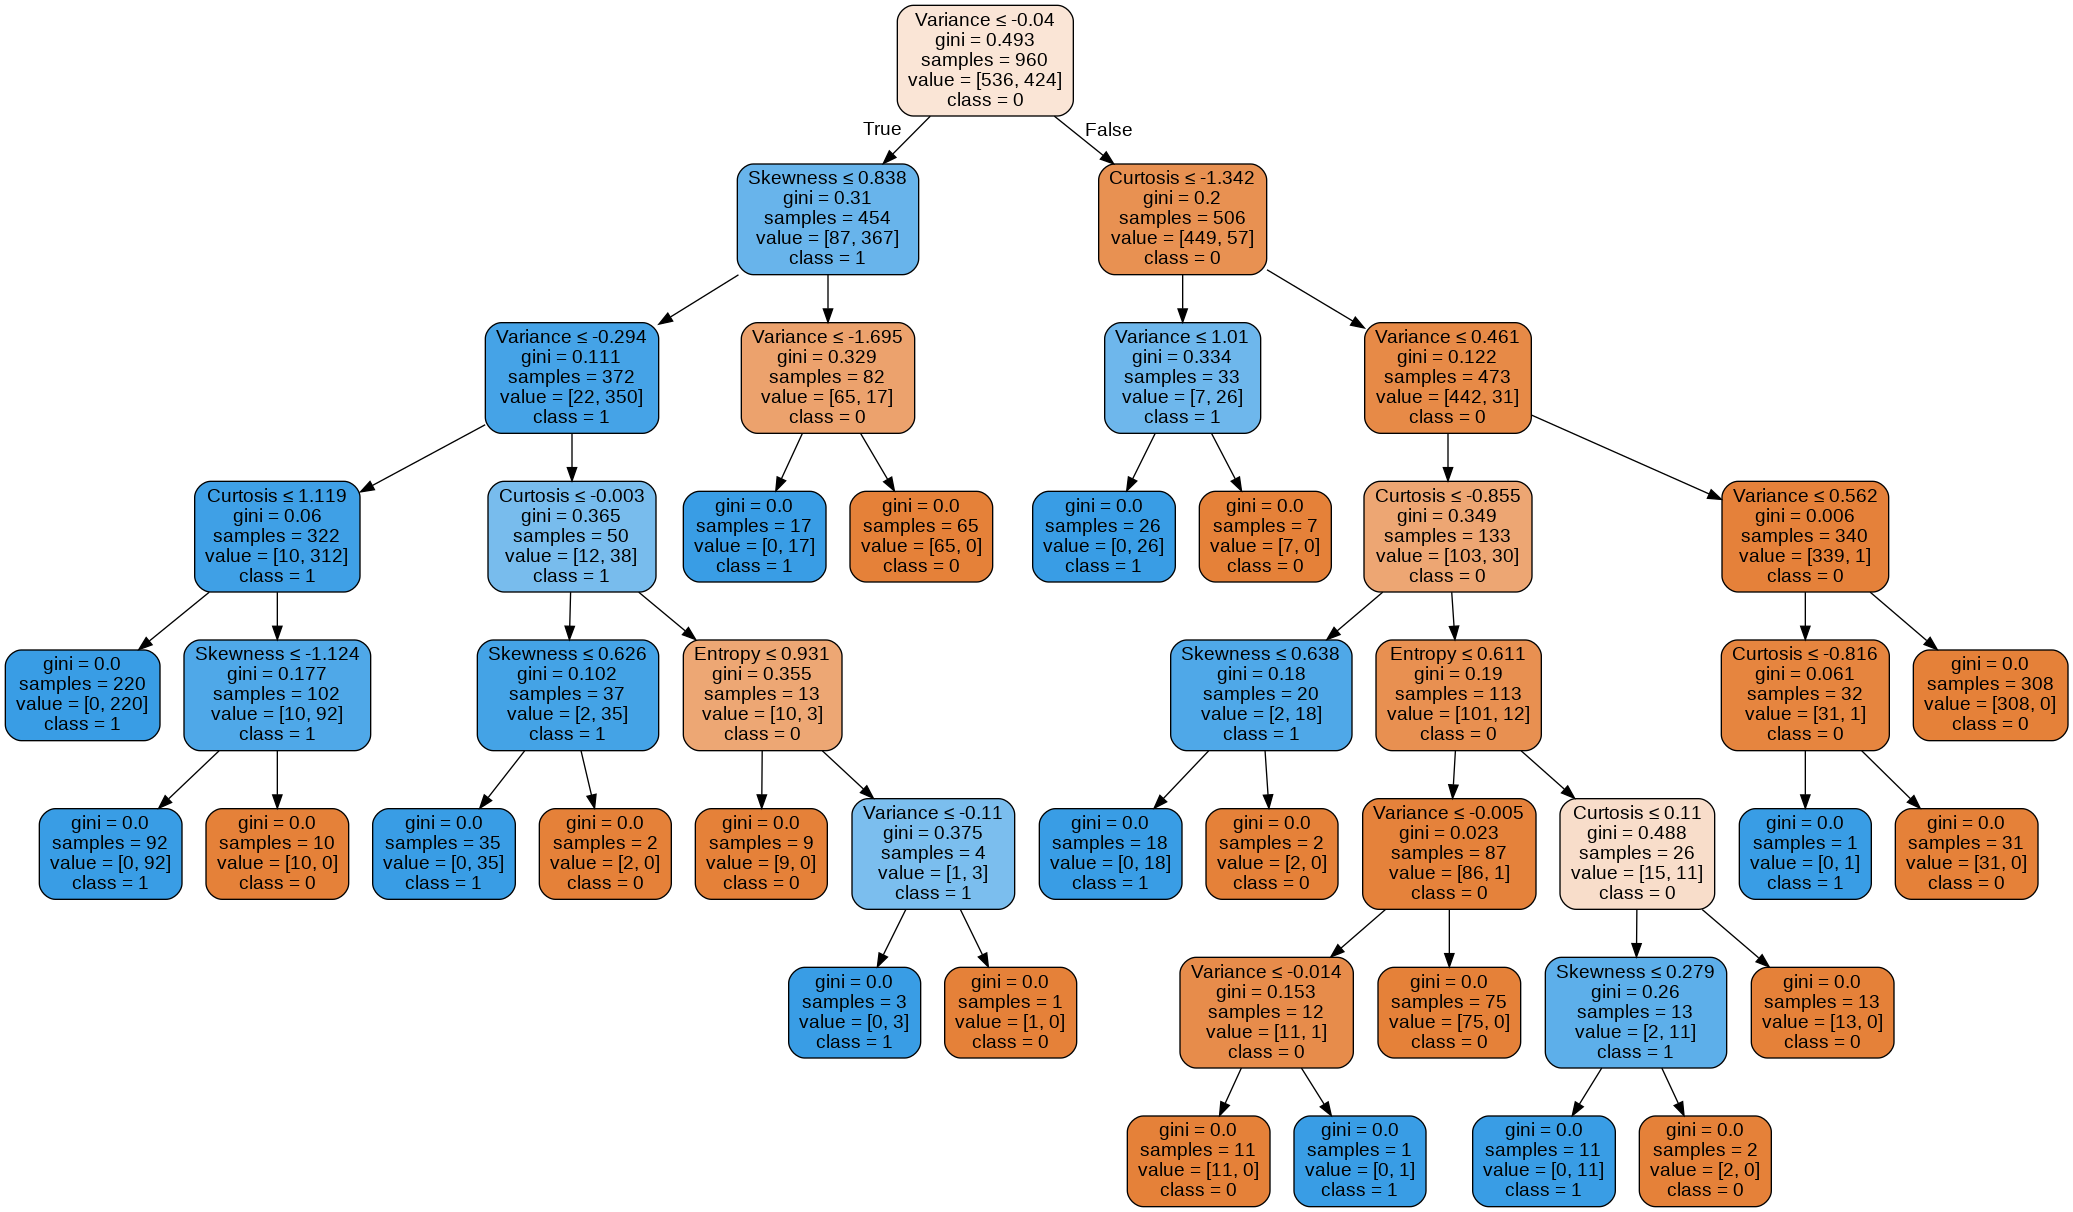

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data=StringIO()
export_graphviz(bill_tree, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names=['Variance','Skewness','Curtosis','Entropy'],class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('Bill_AuthenticationTree.png')
Image(graph.create_png())